## Resigning Employees 

In this Notebook we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia (two data frames). 

We will try to answer the following questions: 


- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    

In [54]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

In [55]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [56]:
print("rows x columns", dete_survey.shape)
print(" ")
dete_survey.info()

rows x columns (822, 56)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null

In [57]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

##### About the Department of Education, Training and Employment dataset:

- rows x columns (822, 56)

We have a dataframe with many columns of which we will have to select a subset for the analysis. We have a low percentage of columns with a large number of null values, namely:

- Classification
- Business Unit
- Aboriginal
- Torres Strait
- South Sea
- Disability
- NESB

In [58]:
tafe_survey.head(5)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [59]:
print("rows x columns", tafe_survey.shape)
print(" ")
tafe_survey.info()

rows x columns (702, 72)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                 

In [60]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

##### About the Technical and Further Education (TAFE) institute in Queensland dataset:

- rows x columns (702, 72)

Este dataframe tiene distinta cantidad de columnas que el anterior, aunque igual son muchas, habrá que seleccionar solo algunas de ellas. Además casi todas las columnas tienen del orden de 100 valores nulos de un total de 702



##### Let's drop the columns that we won't use in our analysis:

In [61]:
dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated') 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

##### Because we eventually want to combine them, we'll have to standardize the column names:

In [62]:
dete_survey_updated.columns = \
dete_survey_updated.columns.str.lower().str.strip().str.replace(" ","_")

In [63]:
tafe_names = {'Record ID': 'id','CESSATION YEAR': 'cease_date',\
              'Reason for ceasing employment': 'separationtype',\
             'Gender. What is your Gender?': 'gender',\
             'CurrentAge. Current Age': 'age',\
             'Employment Type. Employment Type': 'employment_status',\
             'Classification. Classification': 'position',\
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}

tafe_survey_updated = tafe_survey_updated.rename(columns = tafe_names)

In [64]:
dete_survey_updated.head(5)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [65]:
tafe_survey_updated.head(5)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


##### Our end goal is to answer the following question:
Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [66]:
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [67]:
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [68]:
resignation_types = dete_survey_updated["separationtype"].str.contains("Resignation", na=False)
dete_resignations = dete_survey_updated[resignation_types].copy()
dete_resignations.reset_index(inplace=True)
dete_resignations.head()

,index,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
1,5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
2,8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
3,9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
4,11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


In [69]:
resignation_types2 = tafe_survey_updated["separationtype"].str.contains("Resignation", na=False)
tafe_resignations = tafe_survey_updated[resignation_types].copy()
tafe_resignations.reset_index(inplace=True)
tafe_resignations.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


,index,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
1,5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
2,8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,...,-,-,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
3,9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,...,-,-,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2
4,11,6.341719e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2010.0,Retrenchment/ Redundancy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Male,56 or older,Permanent Part-time,Tutor,11-20,11-20


### Let's verify that the data doesn't contain any major inconsistencies. We'll focus on verifying that the years in the cease_date and dete_start_date columns make sense.


- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.


In [70]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
09/2010      1
07/2012      1
07/2006      1
Name: cease_date, dtype: int64

In [71]:
dete_years = dete_resignations["cease_date"].str.\
extract(r"(?P<Month>[0-9][0-9]/)?(?P<Year>[1-2][0-9][0-9][0-9])?", expand=True)["Year"]
dete_years.unique()

array(['2012', '2013', '2010', '2014', nan, '2006'], dtype=object)

In [72]:
dete_resignations["cease_date"] = dete_years.astype("float64", inplace=True)

In [73]:
dete_resignations["cease_date"].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [74]:
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [75]:
tafe_resignations["cease_date"].value_counts().sort_index(ascending=True)

2009.0     2
2010.0    37
2011.0    92
2012.0    93
2013.0    41
Name: cease_date, dtype: int64

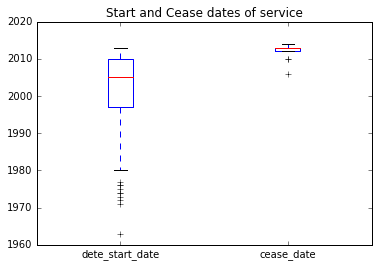

In [76]:
dete_resignations[["dete_start_date","cease_date"]].plot(kind="box", title="Start and Cease dates of service")


#### We can see that there aren't any major issues with the years.

#### Also viewing the TAFE dataset, there is a column named "institute_service" (the length of time an employee spent in a workplace). Let's create an institute_service column in dete_resignations

In [77]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - \
dete_resignations["dete_start_date"]
dete_resignations["institute_service"].head()

0     7.0
1    18.0
2     3.0
3    15.0
4     3.0
Name: institute_service, dtype: float64

#### Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:

- tafe_survey_updated:
        Contributing Factors. Dissatisfaction
        Contributing Factors. Job Dissatisfaction
- dafe_survey_updated:
        job_dissatisfaction
        dissatisfaction_with_the_department
        physical_work_environment
        lack_of_recognition
        lack_of_job_security
        work_location
        employment_conditions
        work_life_balance
        workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [78]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         146
Contributing Factors. Dissatisfaction      25
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [79]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      141
Job Dissatisfaction     30
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [81]:
def update_vals(value): 
    if pd.isnull(value):
        return np.nan
    elif value == "-":
        return np.nan
    else: 
        return True
    

In [82]:
factors_tafe = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]
tafe_resignations[factors_tafe] = tafe_resignations[factors_tafe].applymap(update_vals)

In [83]:
factors_dete = ["job_dissatisfaction","dissatisfaction_with_the_department",\
"physical_work_environment","lack_of_recognition","lack_of_job_security",\
"work_location","employment_conditions","work_life_balance","workload"]

dete_resignations[factors_dete].head(5)

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False
3,True,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [119]:
dete_resignations["dissatisfied"] = dete_resignations[factors_dete].any(axis=1, skipna=False)
tafe_resignations["dissatisfied"] = tafe_resignations[factors_tafe].any(axis=1, skipna=False)

In [122]:
tafe_resignations["institute_service"].value_counts()

Less than 1 year      49
3-4                   41
11-20                 33
1-2                   30
More than 20 years    30
7-10                  20
5-6                   18
Name: institute_service, dtype: int64

In [124]:
tafe_resignations["institute_service"] = tafe_resignations["institute_service"].str.replace("Less than 1 year","0.5")\
.str.replace("Less than 1 year","0.5")\
.str.replace("3-4","3.5")\
.str.replace("11-20","14.5")\
.str.replace("1-2","1.5")\
.str.replace("More than 20 years","21")\
.str.replace("7-10","8.5")\
.str.replace("5-6","5.5")\

tafe_resignations["institute_service"].value_counts()

0.5     49
3.5     41
14.5    33
21      30
1.5     30
8.5     20
5.5     18
Name: institute_service, dtype: int64

In [170]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

#### What we want now is to combine the two dataframes and aggregate the data according the "institute_service" column (employee service time):

In [171]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute_service"].astype("str", inplace=True)
print("")

In [172]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],axis=0, ignore_index=True)

In [173]:
combined["institute_service"].value_counts()

0.5     49
3.5     41
14.5    33
1.5     30
21      30
5.0     23
1.0     22
3.0     20
0.0     20
8.5     20
5.5     18
6.0     17
4.0     16
2.0     14
9.0     14
7.0     13
8.0      8
13.0     8
20.0     7
15.0     7
10.0     6
14.0     6
22.0     6
17.0     6
12.0     6
16.0     5
18.0     5
23.0     4
11.0     4
24.0     4
39.0     3
19.0     3
21.0     3
32.0     3
25.0     2
26.0     2
36.0     2
28.0     2
30.0     2
42.0     1
49.0     1
35.0     1
34.0     1
38.0     1
33.0     1
29.0     1
27.0     1
41.0     1
31.0     1
Name: institute_service, dtype: int64

##### The data in the "institute_service" column is not uniform, we have to modify them.

In [174]:
combined["institute_service"] = combined["institute_service"].astype("float")

#### Let's categorize the values in the institute_service column using the definitions above:


    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company



In [175]:
def categorize(value): 
    if not pd.isnull(value):
        if value < 3: 
            return "New"
        elif (value >= 3) and (value <= 6):
            return "Experienced"
        elif (value >= 7) and (value <= 10):
            return "Established"
        else: 
            return "Veteran"

In [176]:
combined["service_cat"] = \
combined["institute_service"].apply(categorize)
combined["service_cat"].value_counts()

Veteran        163
New            135
Experienced    135
Established     61
Name: service_cat, dtype: int64

In [180]:
combined["dissatisfied"].value_counts(dropna=False)

NaN      243
True     174
False    162
Name: dissatisfied, dtype: int64

##### As first aproximation, let's fill the missing values in the dissatisfied column with the value that occurs most frequently in this column, either True or False.

In [201]:
first_aprox_combined = combined.copy()
first_aprox_combined["dissatisfied"].fillna(True, inplace=True)

In [202]:
grouped = first_aprox_combined.pivot_table(index = "service_cat", values = "dissatisfied")

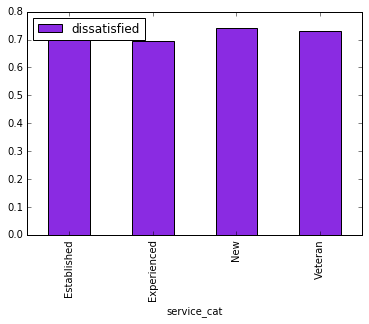

In [203]:
grouped.plot(kind = "bar", color = "blueviolet")

In [221]:
second_aprox_combined = combined.copy()
second_aprox_combined["dissatisfied"] = \
second_aprox_combined["dissatisfied"].astype("bool")
second_aprox_combined.dropna(axis = 0, subset=["dissatisfied"],inplace=True)

In [224]:
grouped2 = second_aprox_combined.pivot_table(index = "service_cat", values = "dissatisfied")

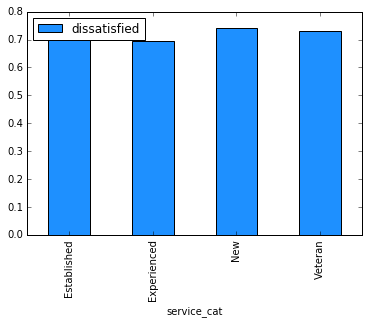

In [225]:
grouped2.plot(kind = "bar", color = "dodgerblue")